In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.datasets import load_svmlight_file
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
%matplotlib inline

In [2]:
# 读取数据
x,y = load_svmlight_file("/Users/limuyi/Desktop/lab2.txt")

In [3]:
# 划分训练集和验证集
xtrain,xtest,ytrain,ytest = train_test_split(
        x,y,test_size = 0.2, random_state = 0)
print('total data shape:',x.shape)
print('train data shape:', xtrain.shape)
print('validation data shape:', xtest.shape)

total data shape: (690, 14)
train data shape: (552, 14)
validation data shape: (138, 14)


In [4]:
class classification(object):
    def operate(model,x,y):
        # 初始化学习率，权重，
        rate = 0.01 
        iters = 500
        w = np.random.randn(xtrain.shape[1])
        b = np.random.randn()
        #print('weight matrix shape:', w.shape)
        model.losses = []
        for i in range(iters):
            hinge = 1 - y * ( x*w+b )
            hinge[hinge < 0] = 0
            loss = np.sum(hinge) + rate * np.linalg.norm(w) / 2
            model.losses.append(loss)       
        # 更新参数
        # wj += rate * ytrain * xtrain
            for j in range(xtrain.shape[0]):
                if ytrain[j] * (xtrain[j]*w + b) < 1:
                    w += (rate * ytrain[j] * xtrain[j]).toarray()[0]
                    b += rate * ytrain[j]                
        return model


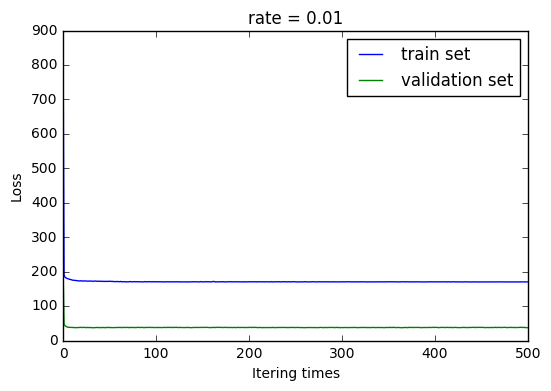

In [5]:
model = classification()

# 可视化
plt.figure()
plt.title('rate = 0.01')
plt.xlabel("Itering times")
plt.ylabel("Loss")

# 训练集
modeltrain = model.operate(xtrain, ytrain)
plt.plot(range(len(modeltrain.losses)), modeltrain.losses, label = 'train set')
# 测试集
modeltest = model.operate(xtest, ytest)
plt.plot(range(len(modeltest.losses)), modeltest.losses, label = 'validation set')

plt.legend()
plt.show()